In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Input data

Dataset 1. Initial data

In [2]:
Phi = np.loadtxt('Dataset_1_Phi.txt')/100 #effective porocity
Dataset_1 = pd.DataFrame(Phi, columns = ['Phi'])
Dataset_1['k'] = np.loadtxt('Dataset_1_k.txt') #permeability 
Dataset_1['F'] = np.loadtxt('Dataset_1_F.txt')
Dataset_1['m'] = np.loadtxt('Dataset_1_m.txt') 
n_1 = 29 #number of elements

Dataset 2. Initial data

In [3]:
Phi_1 = np.loadtxt('Dataset_2_Phi.txt')/100
Dataset_2 = pd.DataFrame(Phi_1, columns = ['Phi'])
Dataset_2['k'] = np.loadtxt('Dataset_2_k.txt')
Dataset_2['F'] = np.loadtxt('Dataset_2_F.txt')
Dataset_2['m'] = np.loadtxt('Dataset_2_m.txt')
n_2 = 6 #number of elements

Dataset 3. Initial data

In [4]:
Phi_2 = np.loadtxt('Dataset_3_Phi.txt')/100
Dataset_3 = pd.DataFrame(Phi_2, columns = ['Phi'])
Dataset_3['k'] = np.loadtxt('Dataset_3_k.txt')
Dataset_3['F'] = np.loadtxt('Dataset_3_F.txt')
Dataset_3['m'] = np.loadtxt('Dataset_3_m.txt')
n_3 = 11 #number of elements


# Updated data with using following formulas:

$$ 0.0314*\sqrt{\frac{k} {Ф}} = (\frac{1}{\sqrt{fg}aSv})*\frac{Ф^m}{(1-Ф)} $$

$$ RQI=0.0314*\sqrt{\frac{k} {Ф}} $$

$$ FZI = (\frac{1}{\sqrt{fg}aSv}) $$

$$ Фz = \frac{Ф}{(1-Ф)} $$

$$ HFU = round(2 ln(FZI)+10.6) $$

In [5]:
def UpdateDataset(Dataset):
    Dataset['RQI'] = 0.0314 * np.sqrt(Dataset['k'] / Dataset['Phi'])
    Dataset['Phi_z'] = Dataset['Phi'] / (1 - Dataset['Phi'])
    Dataset['Phi_z*Pni^(m-1)'] = Dataset['Phi_z'] * Dataset['Phi']**(Dataset['m'] - 1)
    Dataset['FZI_2'] = (Dataset['RQI'] / Dataset['Phi_z*Pni^(m-1)'])
    Dataset['FZI_1'] = (Dataset['RQI'] / Dataset['Phi_z'])
    Dataset['HFU_2'] = round(2 * np.log(Dataset['FZI_2']) + 10.6)
    Dataset['HFU_1'] = round(2 * np.log(Dataset['FZI_1']) + 10.6)  
    return Dataset

Dataset 1. Updated

In [6]:
Dataset_1 = UpdateDataset(Dataset_1)

Dataset 2. Updated

In [7]:
Dataset_2 = UpdateDataset(Dataset_2)

Dataset 3. Updated

In [8]:
Dataset_3 = UpdateDataset(Dataset_3)

Coefficient of determination

In [9]:
def CoefDeterm(Dataset, X, Y, n):
    Dataset['Ln_X'] = np.log(X)
    Dataset['Ln_Y'] = np.log(Y)
    Dataset['Ln_X_ave'] = sum(Dataset['Ln_X']) / n
    Dataset['Ln_Y_ave'] = sum(Dataset['Ln_Y']) / n
    S_1 = 0
    S_2 = 0
    S_3 = 0
    for i in range(0, n):
        S_1 = S_1 + (Dataset['Ln_X'][i] - Dataset['Ln_X_ave'][i]) * (Dataset['Ln_Y'][i] - Dataset['Ln_Y_ave'][i])
        S_2 = S_2 + (Dataset['Ln_X'][i] - Dataset['Ln_X_ave'][i])**2
        S_3 = S_3 + (Dataset['Ln_Y'][i] - Dataset['Ln_Y_ave'][i])**2
    CoefCorel=S_1 / (np.sqrt(S_2) * np.sqrt(S_3))
    DetermCoef=CoefCorel**2 
    return DetermCoef

In [10]:
DC_1_conv = CoefDeterm(Dataset_1, Dataset_1['Phi_z'], Dataset_1['RQI'], n_1)
print('Dataset_1. Conv.model R^2=', DC_1_conv)
DC_1_Unconv = CoefDeterm(Dataset_1, Dataset_1['Phi_z*Pni^(m-1)'], Dataset_1['RQI'], n_1)
print('Dataset_1. Unconv.model R^2=', DC_1_Unconv)

DC_2_conv = CoefDeterm(Dataset_2, Dataset_2['Phi_z'], Dataset_2['RQI'], n_2)
print('Dataset_2. Conv.model R^2=', DC_2_conv)
DC_2_Unconv = CoefDeterm(Dataset_2, Dataset_2['Phi_z*Pni^(m-1)'], Dataset_2['RQI'], n_2)
print('Dataset_2. Unconv.model R^2=', DC_2_Unconv)

DC_3_conv = CoefDeterm(Dataset_3, Dataset_3['Phi_z'], Dataset_3['RQI'], n_3)
print('Dataset_3. Conv.model R^2=', DC_3_conv)
DC_3_Unconv = CoefDeterm(Dataset_3, Dataset_3['Phi_z*Pni^(m-1)'], Dataset_3['RQI'], n_3)
print('Dataset_3. Unconv.model R^2=', DC_3_Unconv)

Dataset_1. Conv.model R^2= 0.3306905062936336
Dataset_1. Unconv.model R^2= 0.5113390361433878
Dataset_2. Conv.model R^2= 0.7401458693116765
Dataset_2. Unconv.model R^2= 0.8008607174059083
Dataset_3. Conv.model R^2= 0.8004175261324497
Dataset_3. Unconv.model R^2= 0.6847317341690485


Regression functions(a and b coefficients in equation of power regression)

In [11]:
def Regression(n_1, n_2, X, Y):
    n = n_2 - n_1
    xData = np.zeros([n])
    yData = np.zeros([n])
    for i in range(n):
        xData[i] = X[i]
        yData[i] = Y[i]
    y = np.log(yData).reshape(-1, 1)
    x = np.hstack((np.log(xData).reshape(-1,1), np.ones((y.size, 1))))

    coeff = np.linalg.inv((x.T.dot(x))).dot(x.T).dot(y)

    a = np.exp(coeff[1])
    b = coeff[0]
    return a,b

In [12]:
a1_conv,b1_conv = Regression(0, n_1, Dataset_1['Phi_z'], Dataset_1['RQI'])
print('Dataset_1. Conv.model y=', a1_conv, 'x^', b1_conv)
a1_Unconv,b1_Unconv = Regression(0, n_1, Dataset_1['Phi_z*Pni^(m-1)'], Dataset_1['RQI'])
print('Dataset_1. Unconv.model y=', a1_Unconv, 'x^', b1_Unconv)

a2_conv,b2_conv = Regression(0, n_2, Dataset_2['Phi_z'], Dataset_2['RQI'])
print('Dataset_2. Conv.model y=', a2_conv, 'x^', b2_conv)
a2_Unconv,b2_Unconv = Regression(0, n_2, Dataset_2['Phi_z*Pni^(m-1)'], Dataset_2['RQI'])
print('Dataset_2. Unconv.model y=', a2_Unconv, 'x^', b2_Unconv)

a3_conv,b3_conv = Regression(0, n_3, Dataset_3['Phi_z'], Dataset_3['RQI'])
print('Dataset_3. Conv.model y=', a3_conv, 'x^', b3_conv)
a3_Unconv,b3_Unconv = Regression(0, n_3, Dataset_3['Phi_z*Pni^(m-1)'], Dataset_3['RQI'])
print('Dataset_3. Unconv.model y=', a3_Unconv, 'x^', b3_Unconv)

Dataset_1. Conv.model y= [5.42411808] x^ [1.40764367]
Dataset_1. Unconv.model y= [12.35962495] x^ [1.03692477]
Dataset_2. Conv.model y= [13.53472821] x^ [1.65043857]
Dataset_2. Unconv.model y= [14.58080024] x^ [0.97811586]
Dataset_3. Conv.model y= [464.36228938] x^ [3.901794]
Dataset_3. Unconv.model y= [98.71227464] x^ [1.60948026]


Trendline

In [13]:
def Trendline(n_1, n_2, a, b, X):
    n = n_2 - n_1
    Trend = np.zeros([n])
    for i in range(n):
        Trend[i] = a * (X[i]**b)
    return Trend

In [14]:
Trend1_conv = Trendline(0, n_1, a1_conv, b1_conv, Dataset_1['Phi_z'])
Trend1_Unconv = Trendline(0, n_1, a1_Unconv, b1_Unconv, Dataset_1['Phi_z*Pni^(m-1)'])
Trend2_conv = Trendline(0, n_2, a2_conv, b2_conv, Dataset_2['Phi_z'])
Trend2_Unconv = Trendline(0, n_2, a2_Unconv, b2_Unconv, Dataset_2['Phi_z*Pni^(m-1)'])
Trend3_conv = Trendline(0, n_3, a3_conv, b3_conv, Dataset_3['Phi_z'])
Trend3_Unconv = Trendline(0, n_3, a3_Unconv, b3_Unconv, Dataset_3['Phi_z*Pni^(m-1)'])

## Plots

Dataset 1

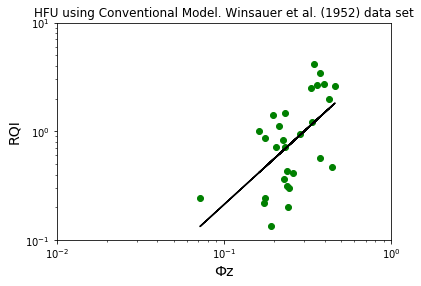

In [15]:
plt.scatter(Dataset_1['Phi_z'], Dataset_1['RQI'], c='green')
plt.plot(Dataset_1['Phi_z'], Trend1_conv[:], color='black')

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,1)
plt.ylim(0.1,10)
plt.xlabel('Фz', size=14)
plt.ylabel('RQI', size=14)
plt.title('HFU using Conventional Model. Winsauer et al. (1952) data set')

plt.show()

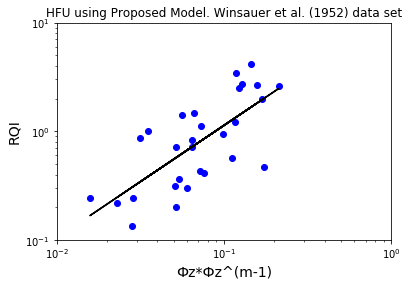

In [16]:
plt.scatter(Dataset_1['Phi_z*Pni^(m-1)'], Dataset_1['RQI'], c='blue')

plt.plot(Dataset_1['Phi_z*Pni^(m-1)'], Trend1_Unconv[:], color='black')

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,1)
plt.ylim(0.1,10)

plt.xlabel('Фz*Фz^(m-1)', size=14)
plt.ylabel('RQI', size=14)
plt.title('HFU using Proposed Model. Winsauer et al. (1952) data set')

plt.show()

Dataset 1

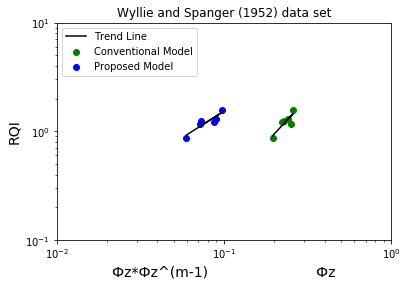

In [17]:
plt.scatter(Dataset_2['Phi_z'], Dataset_2['RQI'], c='green', label='Conventional Model')
plt.scatter(Dataset_2['Phi_z*Pni^(m-1)'], Dataset_2['RQI'], c='blue', label='Proposed Model')

plt.plot(Dataset_2['Phi_z'], Trend2_conv[:], color='black', label='Trend Line')
plt.plot(Dataset_2['Phi_z*Pni^(m-1)'], Trend2_Unconv[:], color='black')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,1)
plt.ylim(0.1,10)

plt.xlabel('Фz*Фz^(m-1)                        Фz', size=14)
plt.ylabel('RQI', size=14)
plt.title('Wyllie and Spanger (1952) data set')
plt.legend(loc = 'upper left')

plt.show()

Dataset 1

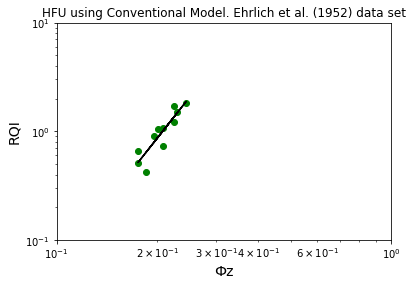

In [18]:
plt.scatter(Dataset_3['Phi_z'], Dataset_3['RQI'], c='green')
plt.plot(Dataset_3['Phi_z'], Trend3_conv[:], color='black')

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1,1)
plt.ylim(0.1,10)

plt.xlabel('Фz', size=14)
plt.ylabel('RQI', size=14)
plt.title('HFU using Conventional Model. Ehrlich et al. (1952) data set')

plt.show()

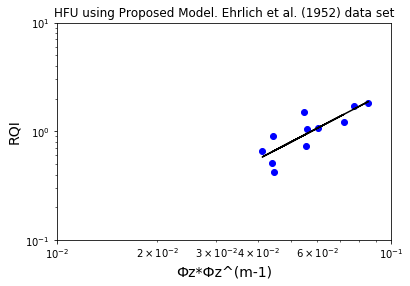

In [19]:
plt.scatter(Dataset_3['Phi_z*Pni^(m-1)'], Dataset_3['RQI'], c='blue')
plt.plot(Dataset_3['Phi_z*Pni^(m-1)'], Trend3_Unconv[:], color='black')


plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,0.1)
plt.ylim(0.1,10)

plt.xlabel('Фz*Фz^(m-1)', size=14)
plt.ylabel('RQI', size=14)
plt.title('HFU using Proposed Model. Ehrlich et al. (1952) data set')

plt.show()

## Rock typing

In [34]:
def HFU(n, Dataset, HFU):
    j = 0
    l = 0
    g = 0
    HFU_sort = np.zeros([n])
    HFU_dif = np.zeros([n])
    Part_X = np.zeros([n])
    Part_Y = np.zeros([n])
    Part_M = np.zeros([n])
    for i in range(n):
        HFU_sort[i] = HFU[i]
    HFU_sort = sorted(HFU_sort)
    HFU_dif[0] = HFU_sort[0]
    for i in range(n):
        if HFU_sort[i] > HFU_dif[j]:
            j = j + 1
            HFU_dif[j] = HFU_sort[i]
    Numbers=np.zeros([j + 1])
    for i in range(j + 1):
        for m in range(n):
            if HFU[m] == HFU_dif[i]:
                Part_X[l] = Dataset['Phi'][m]
                Part_Y[l] = Dataset['k'][m]
                Part_M[l] = Dataset['m'][m]
                l = l + 1
                g = g + 1
        Numbers[i] = g
        g = 0
    return j + 1, Numbers, Part_X, Part_Y, Part_M


In [35]:
def PrintRockTyping(Dataset, n, HFU_number, title):
    if HFU_number == 1:
        j,Numbers, Part_X, Part_Y, Part_M=HFU(n, Dataset, Dataset['HFU_1'])
    elif HFU_number == 2:
        j,Numbers, Part_X, Part_Y, Part_M=HFU(n, Dataset, Dataset['HFU_2'])
    else: 
        return('Error HFU_number')

    b = 0
    a = 0
    for i in range(j):
        b = b + int(Numbers[i])
        if (b - a) >= 1:
            a_t, b_t = Regression(a, b, Part_X[a:b], Part_Y[a:b])
            Trend = Trendline(a, b, a_t, b_t, sorted(Part_X[a:b]))
            plt.plot(sorted(Part_X[a:b]), Trend[:], color='black')

        print(i + 1, 'a =', a_t, 'b =', b_t)
        plt.scatter(Part_X[a:b], Part_Y[a:b], label=i+1)
        a = a + int(Numbers[i])

    plt.yscale('log')
    plt.xlim(0,0.40)
    plt.ylim(1,10000)
    plt.legend(loc = 'upper left')

    plt.xlabel('Porosity', size=14)
    plt.ylabel('Permeability, md', size=14)
    plt.title(title)

Dataset 1

1 a = [44623.87028603] b = [5.26044138]
2 a = [4846.19540286] b = [3.36830227]
3 a = [3058.3667882] b = [2.78421117]
4 a = [33228.58616257] b = [3.34697702]
5 a = [129943.60311788] b = [3.56287328]
6 a = [539844.00412078] b = [4.10949165]
7 a = [1.] b = [33.55743928]


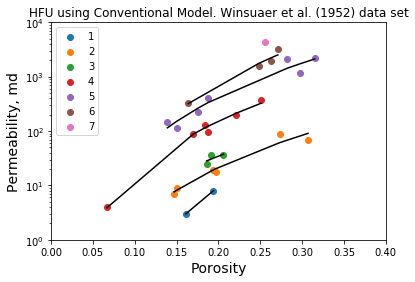

In [36]:
PrintRockTyping(Dataset_1, n_1, 1, 'HFU using Conventional Model. Winsuaer et al. (1952) data set')

1 a = [18566.73743389] b = [4.72571438]
2 a = [185208.17724307] b = [5.57903937]
3 a = [17581777.2061044] b = [7.5763416]
4 a = [234467.17083933] b = [4.14237154]
5 a = [1452532.06097327] b = [4.77293509]


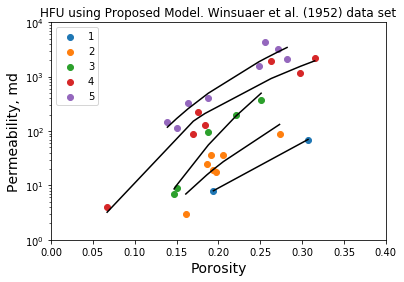

In [37]:
PrintRockTyping(Dataset_1, n_1, 2, 'HFU using Proposed Model. Winsuaer et al. (1952) data set')

Dataset 2

1 a = [1.] b = [0.]
2 a = [132898.84701581] b = [4.13384342]
3 a = [50809791.93018045] b = [7.04395623]
4 a = [107904.88987846] b = [3.11877002]


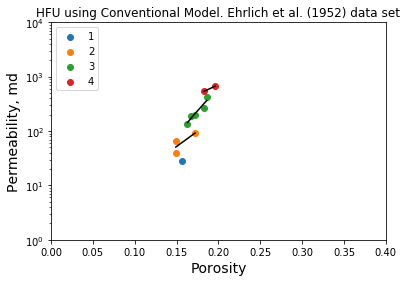

In [38]:
PrintRockTyping(Dataset_3, n_3, 1, 'HFU using Conventional Model. Ehrlich et al. (1952) data set')

1 a = [1.] b = [0.]
2 a = [1.58097436e+08] b = [7.8352657]
3 a = [1.15343704e+09] b = [8.7473139]


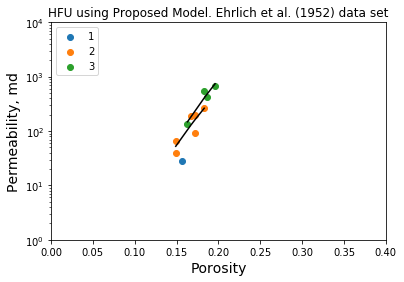

In [39]:
PrintRockTyping(Dataset_3, n_3, 2, 'HFU using Proposed Model. Ehrlich et al. (1952) data set')